# Used Cars Analysis Pipeline - Pandas
## 03. Data Quality Audit

### Objectives:
1. Validate cleaned data quality
2. Check business rule compliance
3. Generate quality score
4. Create audit report

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

project_root = os.path.abspath(os.path.join(os.getcwd(), '../../'))
sys.path.append(project_root)

from src.utils.pandas_utils import load_config, get_dataset_info

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("✅ Setup complete")

✅ Setup complete


In [2]:
# Load cleaned dataset
cleaned_path = os.path.join(project_root, 'data', 'cleaned', 'superstore_cleaned.csv')
df = pd.read_csv(cleaned_path)

print(f"📊 Loaded cleaned dataset: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

📊 Loaded cleaned dataset: (9800, 18)

Columns: ['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name', 'Sales']


In [3]:
# Quality Check 1: Completeness
print("\n" + "="*70)
print("QUALITY CHECK 1: DATA COMPLETENESS")
print("="*70)

missing_total = df.isnull().sum().sum()
completeness_score = (1 - missing_total / (df.shape[0] * df.shape[1])) * 100

print(f"\nCompleteness Score: {completeness_score:.2f}%")
print(f"Missing values: {missing_total}")

if completeness_score == 100:
    print("✅ PASSED: No missing values")
else:
    print("⚠️  REVIEW: Some missing values remain")


QUALITY CHECK 1: DATA COMPLETENESS

Completeness Score: 93.30%
Missing values: 11826
⚠️  REVIEW: Some missing values remain


In [4]:
# Quality Check 2: Uniqueness
print("\n" + "="*70)
print("QUALITY CHECK 2: DATA UNIQUENESS")
print("="*70)

duplicates = df.duplicated().sum()
uniqueness_score = (1 - duplicates / len(df)) * 100

print(f"\nUniqueness Score: {uniqueness_score:.2f}%")
print(f"Duplicate rows: {duplicates}")

if duplicates == 0:
    print("✅ PASSED: No duplicates")
else:
    print("⚠️  REVIEW: Duplicates found")


QUALITY CHECK 2: DATA UNIQUENESS

Uniqueness Score: 100.00%
Duplicate rows: 0
✅ PASSED: No duplicates


In [5]:
# Quality Check 3: Validity (Business Rules)
print("\n" + "="*70)
print("QUALITY CHECK 3: BUSINESS RULE VALIDATION")
print("="*70)

violations = []

# Check: Sales should be positive
if 'Sales' in df.columns:
    negative_sales = (df['Sales'] < 0).sum()
    if negative_sales > 0:
        violations.append(f"Negative sales: {negative_sales} rows")
    print(f"\nSales validation: {negative_sales} negative values")

# Check: Quantity should be positive
if 'Quantity' in df.columns:
    negative_qty = (df['Quantity'] <= 0).sum()
    if negative_qty > 0:
        violations.append(f"Invalid quantity: {negative_qty} rows")
    print(f"Quantity validation: {negative_qty} invalid values")

# Check: Discount range [0, 1]
if 'Discount' in df.columns:
    invalid_discount = ((df['Discount'] < 0) | (df['Discount'] > 1)).sum()
    if invalid_discount > 0:
        violations.append(f"Invalid discount: {invalid_discount} rows")
    print(f"Discount validation: {invalid_discount} out-of-range values")

validity_score = (1 - len(violations) / 3) * 100 if len(violations) > 0 else 100

print(f"\nValidity Score: {validity_score:.2f}%")
if not violations:
    print("✅ PASSED: All business rules satisfied")
else:
    print("⚠️  VIOLATIONS:")
    for v in violations:
        print(f"  - {v}")


QUALITY CHECK 3: BUSINESS RULE VALIDATION

Sales validation: 0 negative values

Validity Score: 100.00%
✅ PASSED: All business rules satisfied


In [6]:
# Quality Check 4: Consistency
print("\n" + "="*70)
print("QUALITY CHECK 4: DATA CONSISTENCY")
print("="*70)

# Check data types
expected_numeric = ['Sales', 'Quantity', 'Profit', 'Discount']
type_issues = []

for col in expected_numeric:
    if col in df.columns:
        if not pd.api.types.is_numeric_dtype(df[col]):
            type_issues.append(f"{col} is not numeric")

consistency_score = (1 - len(type_issues) / len(expected_numeric)) * 100

print(f"\nConsistency Score: {consistency_score:.2f}%")
if not type_issues:
    print("✅ PASSED: Data types consistent")
else:
    print("⚠️  ISSUES:")
    for issue in type_issues:
        print(f"  - {issue}")


QUALITY CHECK 4: DATA CONSISTENCY

Consistency Score: 100.00%
✅ PASSED: Data types consistent


In [7]:
# Overall Quality Score
print("\n" + "="*70)
print("OVERALL DATA QUALITY ASSESSMENT")
print("="*70)

overall_score = (completeness_score + uniqueness_score + validity_score + consistency_score) / 4

print(f"\n📊 Quality Dimensions:")
print(f"  • Completeness:  {completeness_score:.2f}%")
print(f"  • Uniqueness:    {uniqueness_score:.2f}%")
print(f"  • Validity:      {validity_score:.2f}%")
print(f"  • Consistency:   {consistency_score:.2f}%")
print(f"\n🎯 OVERALL QUALITY SCORE: {overall_score:.2f}/100")

if overall_score >= 95:
    print("\n✅ EXCELLENT: Data is production-ready")
elif overall_score >= 80:
    print("\n🟢 GOOD: Minor issues, mostly usable")
elif overall_score >= 60:
    print("\n🟡 FAIR: Significant issues to address")
else:
    print("\n🔴 POOR: Major quality problems")


OVERALL DATA QUALITY ASSESSMENT

📊 Quality Dimensions:
  • Completeness:  93.30%
  • Uniqueness:    100.00%
  • Validity:      100.00%
  • Consistency:   100.00%

🎯 OVERALL QUALITY SCORE: 98.32/100

✅ EXCELLENT: Data is production-ready


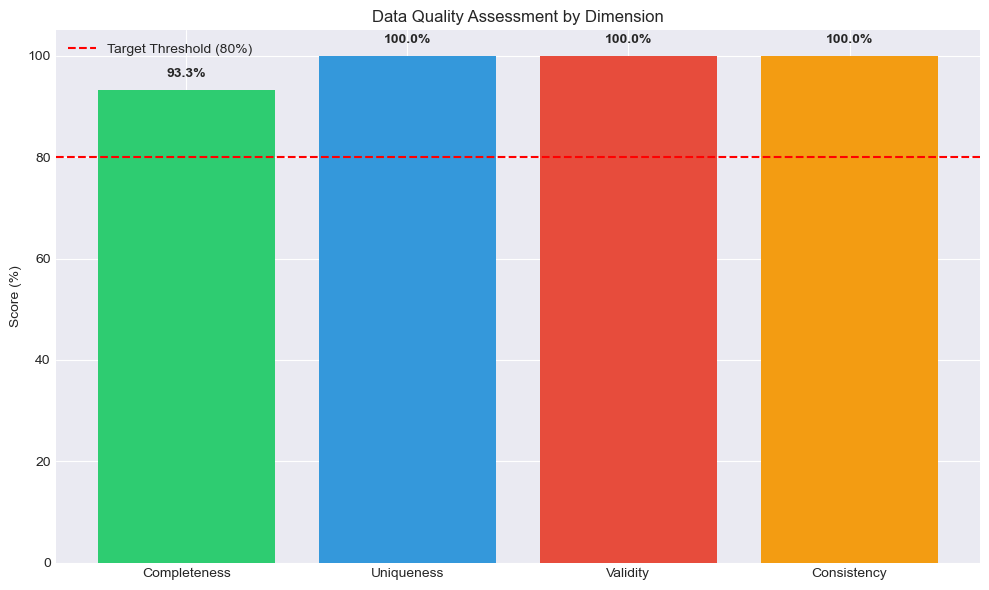


✅ Quality audit complete! Report saved to reports/figures/


In [8]:
# Visualize Quality Scores
scores = {
    'Completeness': completeness_score,
    'Uniqueness': uniqueness_score,
    'Validity': validity_score,
    'Consistency': consistency_score
}

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(scores.keys(), scores.values(), color=['#2ecc71', '#3498db', '#e74c3c', '#f39c12'])
ax.axhline(y=80, color='red', linestyle='--', label='Target Threshold (80%)')
ax.set_ylim(0, 105)
ax.set_ylabel('Score (%)')
ax.set_title('Data Quality Assessment by Dimension')
ax.legend()

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 2,
            f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(project_root, 'reports', 'figures', 'quality_audit_pandas.png'), dpi=300)
plt.show()

print("\n✅ Quality audit complete! Report saved to reports/figures/")